<a href="https://colab.research.google.com/github/therealGARRETTKEYT/CS4410/blob/main/CS_4410Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Optimal k: 2


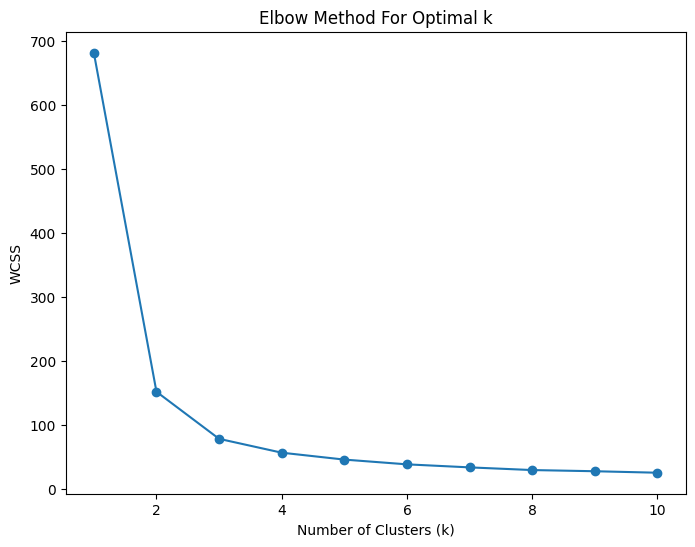

In [8]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np


iris = load_iris()
X = iris.data


wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


second_derivative = np.gradient(np.gradient(wcss))


optimal_k = np.argmax(second_derivative) + 1


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')


print(f"Optimal k: {optimal_k}")

plt.show()

In [7]:
import time
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = mnist[0], mnist[1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


start_time = time.time()
log_reg = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_no_pca = accuracy_score(y_test, y_pred)
time_no_pca = time.time() - start_time


pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

start_time = time.time()
log_reg_pca = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
time_pca = time.time() - start_time


print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")
print(f"Time without PCA: {time_no_pca:.4f} seconds")
print(f"Accuracy with PCA: {accuracy_pca:.4f}")
print(f"Time with PCA: {time_pca:.4f} seconds")


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy without PCA: 0.9164
Time without PCA: 262.0124 seconds
Accuracy with PCA: 0.9216
Time with PCA: 102.1320 seconds
